# Classified Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('Classified Data')

In [3]:
data.head()

,Unnamed: 0,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    1000 non-null   int64  
 1   WTT           1000 non-null   float64
 2   PTI           1000 non-null   float64
 3   EQW           1000 non-null   float64
 4   SBI           1000 non-null   float64
 5   LQE           1000 non-null   float64
 6   QWG           1000 non-null   float64
 7   FDJ           1000 non-null   float64
 8   PJF           1000 non-null   float64
 9   HQE           1000 non-null   float64
 10  NXJ           1000 non-null   float64
 11  TARGET CLASS  1000 non-null   int64  
dtypes: float64(10), int64(2)
memory usage: 93.9 KB


In [5]:
data.columns

Index(['Unnamed: 0', 'WTT', 'PTI', 'EQW', 'SBI', 'LQE', 'QWG', 'FDJ', 'PJF',
       'HQE', 'NXJ', 'TARGET CLASS'],
      dtype='object')

In [6]:
data.drop('Unnamed: 0', axis=1, inplace=True)

In [10]:
from sklearn.model_selection import train_test_split
X = data.drop('TARGET CLASS', axis=1)
y = data['TARGET CLASS']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [20]:
from sklearn.preprocessing import StandardScaler

In [22]:
scaler = StandardScaler()

In [23]:
scaler_X_train = scaler.fit(X_train)

In [25]:
X_train = scaler_X_train.transform(X_train)

In [26]:
scaler_X_test = scaler.fit(X_test)

In [27]:
X_test = scaler_X_test.transform(X_test)

In [28]:
from sklearn.neighbors import KNeighborsClassifier

In [29]:
neighbor = KNeighborsClassifier(n_neighbors=30)

In [30]:
neighbor.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=30)

In [31]:
pred = neighbor.predict(X_test)

In [32]:
from sklearn.metrics import classification_report

In [33]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.96      0.89      0.92       160
           1       0.88      0.96      0.92       140

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300



### finding best value for n value

In [45]:
error_rate = []

for i in range(1,51):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred = knn.predict(X_test)
    error_rate.append(np.mean(pred != y_test))
    #print (pred != y_test)

Text(0, 0.5, 'Error Rate')

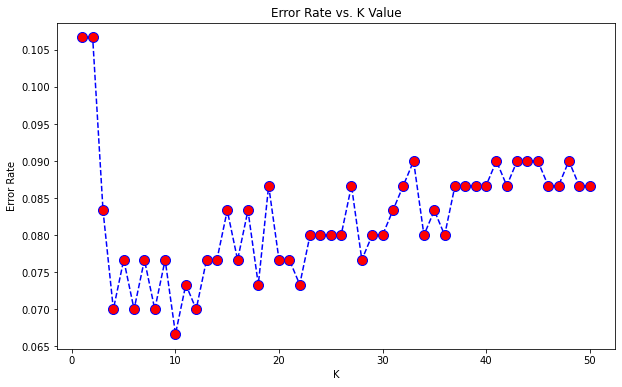

In [46]:
plt.figure(figsize=(10,6))
plt.plot(range(1,51),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [41]:
knn = KNeighborsClassifier(n_neighbors=4)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.93      0.94      0.93       160
           1       0.93      0.92      0.92       140

    accuracy                           0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300



# KNN Project Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('KNN_Project_Data')

In [4]:
data.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
0,1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0
1,1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1
2,1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291,1
3,1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357,0
4,1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   XVPM          1000 non-null   float64
 1   GWYH          1000 non-null   float64
 2   TRAT          1000 non-null   float64
 3   TLLZ          1000 non-null   float64
 4   IGGA          1000 non-null   float64
 5   HYKR          1000 non-null   float64
 6   EDFS          1000 non-null   float64
 7   GUUB          1000 non-null   float64
 8   MGJM          1000 non-null   float64
 9   JHZC          1000 non-null   float64
 10  TARGET CLASS  1000 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 86.1 KB


In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [15]:
X = data.drop('TARGET CLASS', axis=1)
y = data['TARGET CLASS']

In [16]:
scaler.fit(X)
X_scale = scaler.transform(X)

In [20]:
X = pd.DataFrame(X_scale, columns=data.columns[:-1])
X.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC
0,1.568522,-0.443435,1.619808,-0.958255,-1.128481,0.138336,0.980493,-0.932794,1.008313,-1.069627
1,-0.112376,-1.056574,1.741918,-1.504220,0.640009,1.081552,-1.182663,-0.461864,0.258321,-1.041546
2,0.660647,-0.436981,0.775793,0.213394,-0.053171,2.030872,-1.240707,1.149298,2.184784,0.342811
3,0.011533,0.191324,-1.433473,-0.100053,-1.507223,-1.753632,-1.183561,-0.888557,0.162310,-0.002793
4,-0.099059,0.820815,-0.904346,1.609015,-0.282065,-0.365099,-1.095644,0.391419,-1.365603,0.787762


In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [23]:
from sklearn.neighbors import KNeighborsClassifier

In [24]:
error_range = []

for i in range(1,50):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred = knn.predict(X_test)
    error_range.append( np.mean(pred != y_test) )

In [26]:
error_range

[0.23666666666666666,
 0.24333333333333335,
 0.21333333333333335,
 0.19,
 0.19666666666666666,
 0.18,
 0.18666666666666668,
 0.19,
 0.19,
 0.20666666666666667,
 0.20333333333333334,
 0.19,
 0.19666666666666666,
 0.17333333333333334,
 0.19666666666666666,
 0.18666666666666668,
 0.20333333333333334,
 0.19,
 0.18666666666666668,
 0.19,
 0.19666666666666666,
 0.17666666666666667,
 0.19,
 0.18,
 0.17,
 0.17,
 0.17,
 0.17666666666666667,
 0.18,
 0.17,
 0.18333333333333332,
 0.18,
 0.18666666666666668,
 0.18,
 0.17333333333333334,
 0.17666666666666667,
 0.16666666666666666,
 0.16333333333333333,
 0.16666666666666666,
 0.17,
 0.17333333333333334,
 0.17666666666666667,
 0.17,
 0.17,
 0.17666666666666667,
 0.18,
 0.18,
 0.18333333333333332,
 0.17666666666666667]

Text(0, 0.5, 'Error Rate')

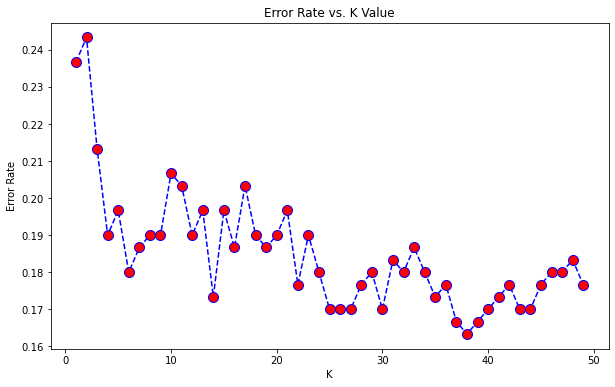

In [29]:
plt.figure(figsize=(10,6))
plt.plot(range(1,50),error_range,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

#### best k is 26

In [31]:
knn = KNeighborsClassifier(n_neighbors=26)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.79      0.84      0.82       134
           1       0.87      0.82      0.84       166

    accuracy                           0.83       300
   macro avg       0.83      0.83      0.83       300
weighted avg       0.83      0.83      0.83       300

